<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd # импорт библиотек
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
try: # открываем файл
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('C:/Users/Елена/Downloads/insurance.csv')

In [3]:
data.head() # изучим файл

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info() # изучим файл

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

После изучения данных можно сделать вывод, что у нас отсутствуют пропущенные значения, все типы данных верные. Количество страховых выплат за последние 5 лет похоже на правду, выбивающихся значений нет.

<AxesSubplot:>

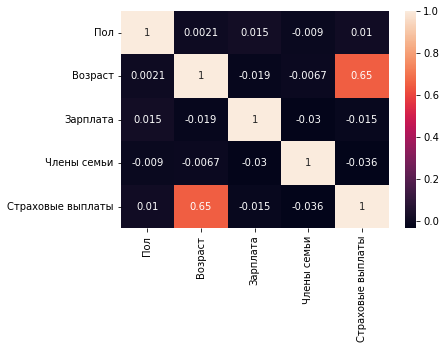

In [6]:
sns.heatmap(data.corr(), annot = True,)

Наибольшая взаимосвязь прослеживается между возрастом и количеством страховых выплат. Остальные значения, можно сказать, не зависят друг от друга.

In [7]:
data.query('Зарплата % 1 > 0')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
80,1,41.0,32700.0,0,0
159,1,19.0,64900.0,2,0
313,0,25.0,32700.0,1,0
392,1,43.0,32700.0,1,1
448,1,32.0,32700.0,2,0
772,1,20.0,65100.0,1,0
820,0,29.0,32200.0,2,0
872,0,23.0,32200.0,3,0
911,0,30.0,32200.0,0,0
963,1,20.0,64100.0,0,0


In [8]:
(data['Зарплата'] % 1 > 0).value_counts()

False    4960
True       40
Name: Зарплата, dtype: int64

In [9]:
data.query('Возраст % 1 > 0')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты


In [10]:
(data['Возраст'] % 1 > 0).value_counts()

False    5000
Name: Возраст, dtype: int64

In [11]:
data['Зарплата'] = data['Зарплата'].astype(int)
data['Возраст'] = data['Возраст'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если признаки умножить на обратимую матрицу, то качество линейной регрессии не изменится.

**Обоснование:** Доказательство рассмотрим в виде решения уравнения, заменив в формуле предсказания w из формулы обучения и домножим матрицу признаков Х на Р, матрицу.

$$
a = X P ((XP)^T XP)^{-1} (XP)^T y
$$

Х - прямоугольная матрица, P - квадратная матрица, значит ХР - прямоугольная матрица. Раскроем внутренние скобки по свойству транспонированной матрицы $\displaystyle (AB)^{T}=B^{T}A^{T}$.

$$
a = X P (P^T X^T X P)^{-1} (XP)^T y
$$

Затем внутри первых скобок перемножим транспонированную матрицу Х на матрицу Х. Таким образом мы получим квадратную матрицу.

$$
a = X P (P^T (X^T Х) P)^{-1} (XP)^T y
$$

Теперь у нас внутри первых скобок все три матрицы квадратные и по свойству обратных матриц ${\displaystyle (AB)^{-1}=B^{-1}A^{-1}}$ мы можем раскрыть первые скобки и сразу раскроем последние скобки

$$
a = X P P^{-1} (X^T Х)^{-1} (P^T)^{-1} P^T X^T y
$$

Обратная матрица — такая матрица $A^{-1}$, при умножении которой на исходную матрицу A получается единичная матрица E:

$\displaystyle AA^{-1}=A^{-1}A=E$ 
Поэтому можем в нашей формуле сократить $ P $ и $P^{-1}$, а так же $(P^T)^{-1}$ и $P^T$.
Перепишем формулу после изменений:

$$
a = X (X^T Х)^{-1} X^T y = Xw
$$

Предсказания после умножения на обратимую матрицу равны предсказаниям до умножения. Чтд

## Алгоритм преобразования

**Алгоритм**

Перейдем к алгоритму преобразования.
Для него:
1. Создадим ненулевую обратимую матрицу. Обратимой может быть только квадратная матрица.
2. Размерность нашей матрицы будет совпадать с количеством столбцов в признаках.
3. Умножим матрицу признаков на новую матрицу. (зашифруем таким образом персональные данные) 
4. Таким образом получим новую матрицу признаков, из которой нельзя будет понять персональные данные клиентов страховой компании.

**Обоснование**
В предыдущем пункте мы доказали путем вычисления, что умножение признаков на обратимую матрицу не повлияет на качество линейной регрессии. Сейчас докажем это на примере. 

In [13]:
e = np.eye(4,4)
e

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [14]:
r = np.random.RandomState(42) # пишем функцию на получение случайной матрицы и проверяем ее на обратимость
def new_features():
    p = r.randint(1,100, size = (4, 4))
    try:
        p1 = np.linalg.inv(p)
        p @ p1 == e
        return p
    except:
        return new_features()

In [15]:
p = new_features() # получаем эту новую матрицу
p

array([[52, 93, 15, 72],
       [61, 21, 83, 87],
       [75, 75, 88, 24],
       [ 3, 22, 53,  2]])

In [16]:
p1 = np.linalg.inv(p)
e = p @ p1 # проверяем, что свойство обратной матрицы о получении единичной в результате перемножения работает
e.round()

array([[ 1.,  0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [ 0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

Матрицу создали, проверили, переходим к выделению признаков и целевого признака.

In [17]:
features = data.drop(['Страховые выплаты'], axis=1) # выделяем признаки и целевой признак в отдельные переменные
target = data['Страховые выплаты']

In [18]:
features.head() # проверка

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [19]:
target.head() # проверка

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

In [20]:
features_new = features @ p # умножаем матрицу признаков на квадратную матрицу и получаем новую матрицу признаков
features_new

,0,1,2,3
0,3722556,3720976,4368271,1194041
1,2852809,2850988,3347871,916004
2,1576769,1575609,1850407,506523
3,3128787,3127985,3671449,1002631
4,1959260,1958181,2299139,628908
...,...,...,...,...
4995,2679214,2678132,3144030,859240
4996,3932077,3930736,4614075,1260560
4997,2543726,2542964,2984966,815344
4998,2453903,2453121,2879600,786792


## Проверка алгоритма

Теперь, когда признаки подготовлены, можно перейти к обучению модели и проверке не изменилось ли ее качество

In [21]:
class LinearRegression: # обучение модели
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('Качество метрики R2 на исходных данных',r2_score(target, predictions))
model.fit(features_new, target)
predictions_new = model.predict(features_new)
print('Качество метрики R2 на новых данных',r2_score(target, predictions_new))

Качество метрики R2 на исходных данных 0.42494550308169177
Качество метрики R2 на новых данных 0.4249455030816428


Теперь еще попробуем расшифровать данные и убедиться, что это и правда возможно при наличии ключа

In [22]:
old_features = round(features_new.dot(np.linalg.inv(p))) # проверяем можем ли мы расшифровать наши данные обратно
old_features.head(), features.head()

(     0     1        2    3
 0  1.0  41.0  49600.0  1.0
 1  0.0  46.0  38000.0  1.0
 2  0.0  29.0  21000.0 -0.0
 3 -0.0  21.0  41700.0  2.0
 4  1.0  28.0  26100.0 -0.0,
    Пол  Возраст  Зарплата  Члены семьи
 0    1       41     49600            1
 1    0       46     38000            1
 2    0       29     21000            0
 3    0       21     41700            2
 4    1       28     26100            0)

Как мы видим, качество не изменилось. Мы доказали не только путем решения уравнения, но и на примере, что качество линейной регрессии не изменится, если признаки умножить на обратимую матрицу. 
Таким образом, получается отличный способ для страховой компании, как можно зашифровать персональные данные клиентов.